# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Model CAPM as a simple linear regression

In [3]:
from scipy import stats
#help(stats.linregress)

In [7]:
import pandas as pd
import pandas_datareader as web
import quandl

In [67]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-15')

In [68]:
spy_etf= pd.read_csv('SPY.csv',index_col='Date',parse_dates=True)
spy_etf['CLose'] = spy_etf['Adj Close']
spy_etf = spy_etf[['Open','High','Low','Close']]
spy_etf= spy_etf[start:end]
spy_etf.head()

,Open,High,Low,Close
Date,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002
2010-01-05,113.260002,113.680000,112.849998,113.629997
2010-01-06,113.519997,113.989998,113.430000,113.709999
2010-01-07,113.500000,114.330002,113.180000,114.190002
2010-01-08,113.889999,114.620003,113.660004,114.570000


In [69]:
#aapl = web.DataReader('AAPL','google',start,end)
aapl = quandl.get('WIKI/AAPL',start_date=start,end_date=end)
aapl['Close'] = aapl['Adj. Close']
aapl = aapl[['Open','High','Low','Close']]
aapl.head()

,Open,High,Low,Close
Date,,,,
2010-01-04,213.43,214.50,212.38,27.503268
2010-01-05,214.60,215.59,213.25,27.550818
2010-01-06,214.38,215.23,210.75,27.112585
2010-01-07,211.75,212.00,209.05,27.062465
2010-01-08,210.30,212.00,209.06,27.242385


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

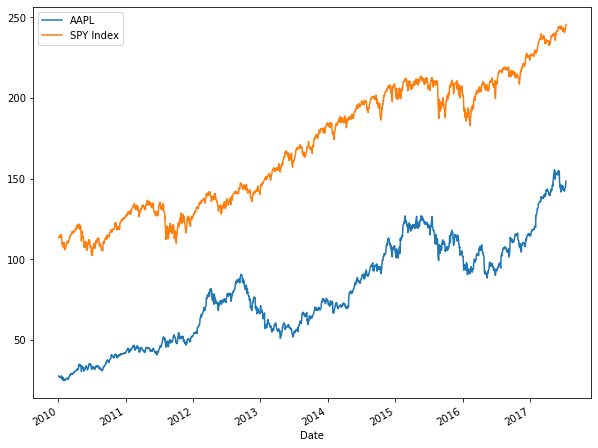

In [71]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [72]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

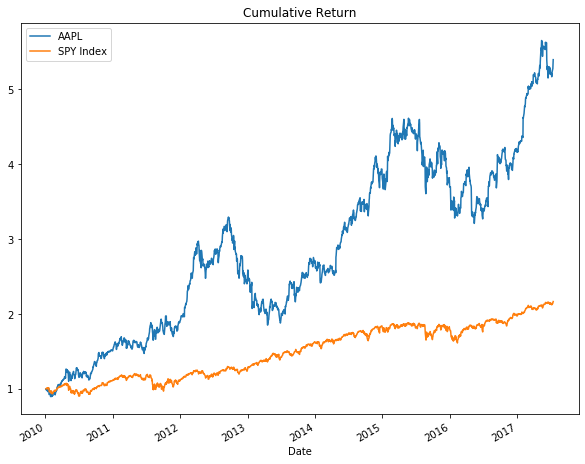

In [73]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [76]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

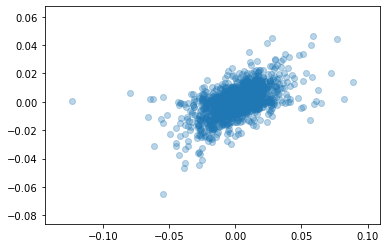

In [77]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

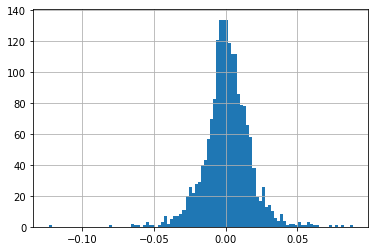

In [78]:
aapl['Daily Return'].hist(bins=100)

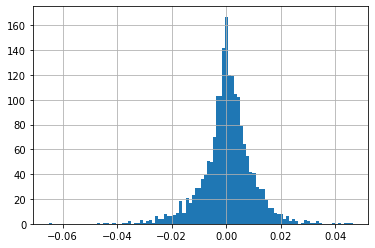

In [79]:
spy_etf['Daily Return'].hist(bins=100)

In [80]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [81]:
beta

0.3262756654486291

In [82]:
alpha

0.00012012328331384247

In [83]:
r_value

0.556098642791219